# Repaso terorema central del limite

Al final es que un calculo distribuye normal.

p valor: Es la probabilidad acumulada de obtener un valor dentro de la distribucion normal de los valores. Mientras mas al centro de le media tu valor, mas probabilidad acumula, y p es mucho mas grande, y mas chance de aceptar la hipotesis nula.

# Esta clase veremos la regresion lineal y empezaremos a ver Machine Learning!

## Modelos estadisticos

Permite ver cuanto afecta una variable a un resultado, y se puede ver si es estadisticamente
significante.

## Pasos Machine Learning

1. Tomo los datos
2. Guardo los datos
3. Separo los datos en datos de entrenamiento y de testeo
4. Entreno mi modelo
5. Predigo los resultados
6. Comparo con los resultados que se saben son correctos
7. Calculo que tan bueno es mi modelo

# Regresion Lineal

- Responde a: **Como una variable independiente afecta a la variable dependiente?**

- Variable Dependiente: Variable que es afectada por la variable dependiente
- Variable Independiente: Variable que explica el comportamiento de la variable dependiente


## Codificacion de Variables Categoricas:

- One-Hot Encoding: Se hace con el pd.get_dummies(variable). Se generan tantas columnas como valores
tiene la variable. Luego, cada registro llevara un 1 si es que posee a la variable de la columna, y
un 0 si es que no. 
- Binary Encoding: Es como el One-Hot Encoding, pero se genera 1 variable menos que en OHE. Si todas
las demas categorias son 0, entonces implicitamente se sabe que la variable que no se le hizo una
columna es 1.

# Codificacion Variables Categoricas

In [1]:
import pandas as pd

diccionario = {
    'nombre': ['Juan', 'Diego', 'Alonso', 'Lel'],
}

df = pd.DataFrame(diccionario)

In [4]:
# One-Hot Encoding
pd.get_dummies(df['nombre'])

# Binary Encoding, es la mas recomendada!
pd.get_dummies(df['nombre'], drop_first=True)

,Diego,Juan,Lel
0,0,1,0
1,1,0,0
2,0,0,0
3,0,0,1


# Regresiones

Al final es hacer una linea recta! Tiene la forma:

y = mx + b 

In [10]:
import warnings
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import lec5_graphs as gfx

warnings.filterwarnings('ignore')
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

In [11]:
df = pd.read_csv('earnings.csv').drop(columns=['Unnamed: 0'])
df.sample(n=10)

,earn,height1,height2,sex,race,hisp,ed,yearbn,height,age,age_category,eth,male
166,24000.0,5,4,2,1,2,16,44,64,46,2,3,0
539,28000.0,6,3,1,2,2,9,35,75,55,3,1,1
949,96000.0,5,3,2,1,2,14,63,63,27,1,3,0
108,33000.0,5,7,2,1,2,13,47,67,43,2,3,0
1313,15000.0,5,4,2,1,2,13,49,64,41,2,3,0
340,1000.0,5,5,2,1,2,12,72,65,18,1,3,0
1321,42000.0,6,2,1,1,2,17,47,74,43,2,3,1
908,0.0,5,4,2,1,2,16,45,64,45,2,3,0
81,10000.0,5,2,2,1,2,12,43,62,47,2,3,0
361,12000.0,6,1,1,1,2,12,61,73,29,1,3,1


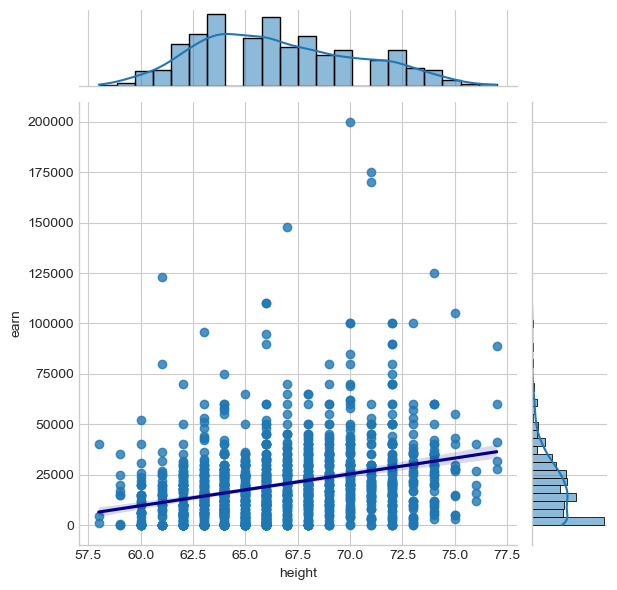

In [18]:
sns.jointplot(data=df, x='height', y='earn', kind='reg', line_kws={'color': 'darkblue'})

Si vemos la recta generada por seaborn, veamos que esta tiene un halo tenue a lo largo de la recta. Esto se debe al error de la variable!, y debe ser agregada a la recta. Por lo tanto, la ecuacion de la recta/regresion es:

y = mx + b + e

# Mirada econometrica

Si la variable independiente se comporta normal, entonces la variable dependiente tambien se
va a comportar normal!

# statsmodels

- Permite generar una regresion bajo la vista econometrica, y utiliza los minimos cuadrados.

In [24]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

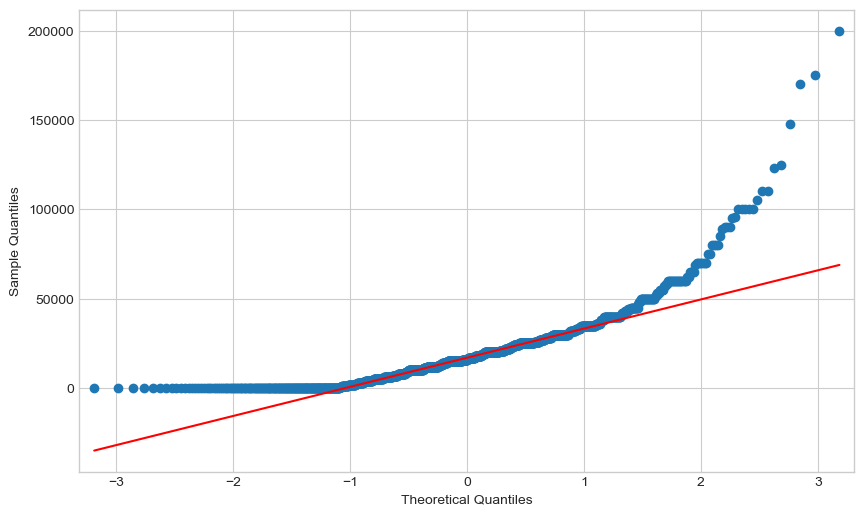

In [27]:
# Como ver si una variable es normal!

# Con qqplot
sm.qqplot(df['earn'], line='q')
plt.show()

# De forma general, se puede ver que las colas NO se ajustan a la normal

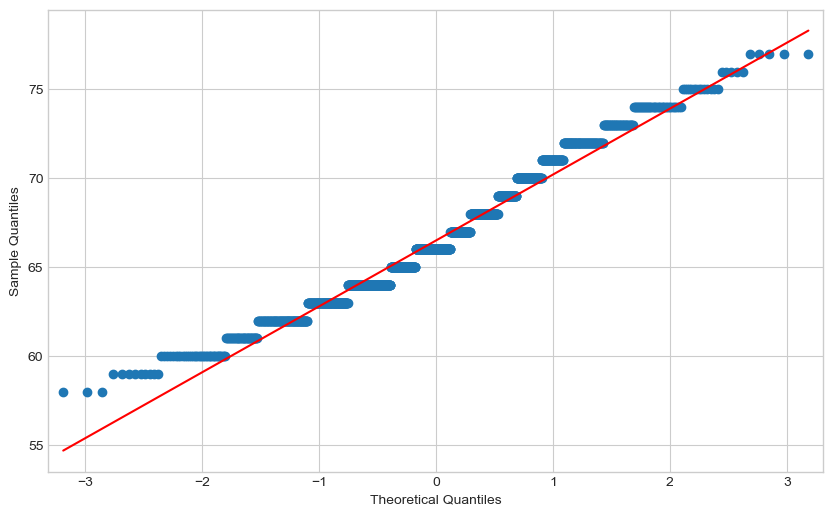

In [28]:
sm.qqplot(df['height'], line='q')
plt.show()

# De forma general, se puede ver que la altura si se ajusta a una normal

<AxesSubplot:xlabel='height', ylabel='Density'>

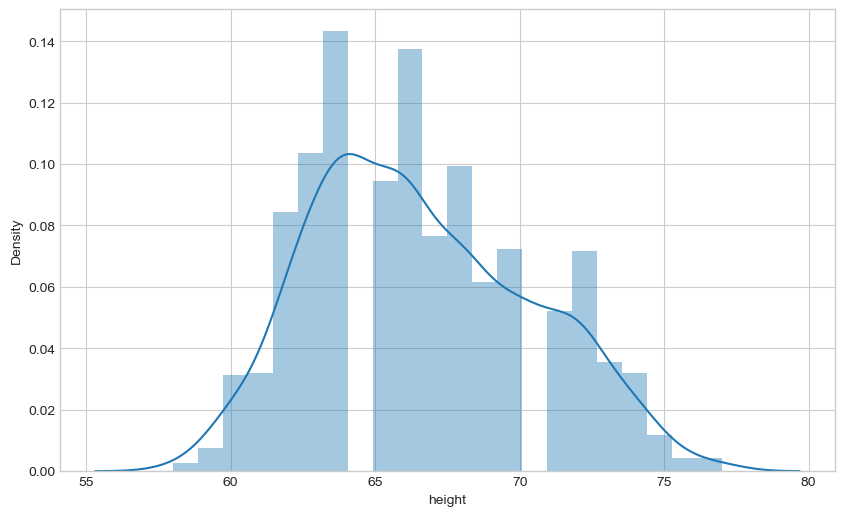

In [29]:
sns.distplot(df['height'])

# Como hacer el modelo con statsmodel

In [32]:
model = smf.ols('earn ~ height', df)
model = model.fit()

- R cuadrado: Explica cuanto afecta la variable independiente a la variable dependiente
- F Statistic: Es el valor estadistico
- Log-likelihood (Variable de verosimilitud): Es un valor relativo entre modelos. El modelo X tiene una mayor verosimilitud
que el modelo Y, por lo que X es mejor. Por si solo no sirve para nada
- IC: Toma la variable de verosimilitud, y toma en cuenta la cantidad de variables que se utilizaron
para predecir. Luego, calcula el IC! Mayor cantidad de variables, menor valor!
- BIC: Idk 

In [36]:
model.summary()

# Aqui se pueden ver todos los valores que permiten ver que tan bueno es el modelo.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   earn   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     138.4
Date:                Tue, 10 Jan 2023   Prob (F-statistic):           1.65e-30
Time:                        20:45:16   Log-Likelihood:                -15475.
No. Observations:                1374   AIC:                         3.095e+04
Df Residuals:                    1372   BIC:                         3.097e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -8.487e+04   8926.986     -9.507      0.000   -1.02e+05   -6.74e+04
height      1574.4103    133.829     11.764      0.000    1311.879    1836.942
==============================================================================
Omnibus:                      868.584   Durbin-Watson:                   1.903
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13733.247
Skew:                           2.677   Prob(JB):                         0.00
Kurtosis:                      17.533   Cond. No.                     1.17e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# los resultados muestran que hay un r2 de 0.092. O sea, el cambio de earnings se explica en un
# 9.2% por height

# Ademas, se puede ver que la probabilidad de F-statistic es 1.65 x 10^-30, lo que es ultra pequeno.
# Por lo tanto, se rechaza la hipotesis nula. La hipotesis nula que esta rechazando la 

In [ ]:
# En Intercept se estan probando las siguientes cosas:
# - Inercept = 0, Como P > |t| es 0.0, se rechaza la hipotesis nula y el intercepto es distinto de 0!
# = height = 0, Como P > |t| es 0.0, se rechaza la hipotesis nula y el intercepto es distinto de 0!

# El test F statistic esta testeando la siguiente hipotesis nula:
# La variable1 NO tiene efecto en la variable2. Pero creo que al reves

# Como es un valor de F statistic tan pequeno (menor a 0.05), entonces la variable1 NO explica a la
# variable 2. 
